In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import dynesty
import corner

In [2]:
loc = '.'
cl_EEo = np.load('%s/cl_EEo_fig4.npy'%loc)
cl_BBo = np.load('%s/cl_BBo_fig4.npy'%loc)
cl_EBo = np.load('%s/cl_EBo_fig4.npy'%loc)
cl_EEcmb_bl2 = np.load('%s/cl_EEth_bl2.npy'%loc,)
cl_BBcmb_bl2 = np.load('%s/cl_BBth_bl2.npy'%loc,)

i = 0
j = 0
EEo, BBo, EBo, EEcmb_bl2, BBcmb_bl2= cl_EEo[i][j], cl_BBo[i][j], cl_EBo[i][j], cl_EEcmb_bl2[i], cl_BBcmb_bl2[i]

deg = np.array([-3, -2, -1, 0, 1, 2, 3])*np.pi/180       
pos = np.array([0.0, 0.5*np.pi/180 ]) + np.random.uniform(-10,10,(20,2)) * np.pi/180.

[   0    1    2 ... 1022 1023 1024]


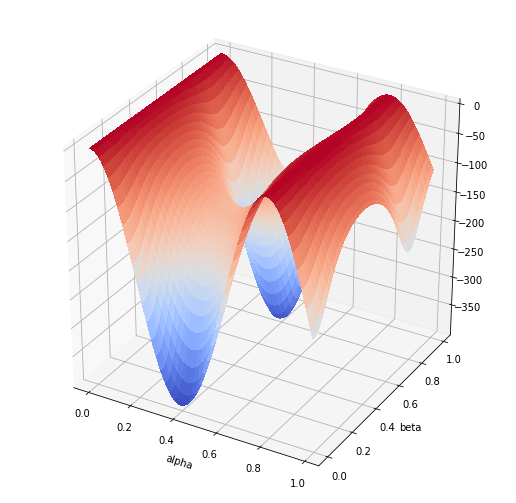

In [3]:
lmax = L = 1024; lmin = 2; nside = 512; Nf = 6
ell = np.arange(lmax+1)
print (ell)
#fre = np.array([50, 78, 119, 195, 235, 337])

def log_likelihood(cube):
    alpha = cube[0]
    beta = cube[1]
    model = 0.5*np.tan(4*alpha)*(EEo-BBo) + 0.5*np.sin(4*beta)/np.cos(4*alpha)*(EEcmb_bl2-BBcmb_bl2)
    var = (1./(2.*ell+1)*EEo*BBo+ 0.5*(np.tan(4*alpha))**2/(2.*ell+1)*(EEo**2+BBo**2) - np.tan(4*alpha)*2./(2.*ell+1)*EBo*(EEo-BBo)) + 1./(2.*ell+1)*(1-(np.tan(4*alpha))**2)*EBo**2
    return -np.sum ( (EBo[lmin:L]-model[lmin:L])**2/var[lmin:L] + 2.*np.pi*np.log(var[lmin:L]) )/1e+45

def prior(cube):
    alpha = cube[0]*0.8
    beta = cube[1] - 0.5
    return [alpha,beta]


x = np.arange(0,1,0.01)
y = np.arange(0,1,0.01)
X,Y = np.meshgrid(x,y)
Z = np.zeros_like(X)
for i in range(len(x)):
    for j in range(len(y)):
        Z[i,j] = log_likelihood([x[i],y[j]])
        
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
ax.set_xlabel('alpha')
ax.set_ylabel('beta')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

In [4]:
sampler = dynesty.NestedSampler(log_likelihood, prior, 2, nlive=400)
sampler.run_nested()
results = sampler.results

iter: 1813 | +400 | bound: 2 | nc: 1 | ncall: 15133 | eff(%): 14.624 | loglstar:   -inf < -0.000 <    inf | logz: -3.445 +/-  0.102 | dlogz:  0.001 >  0.409                                          

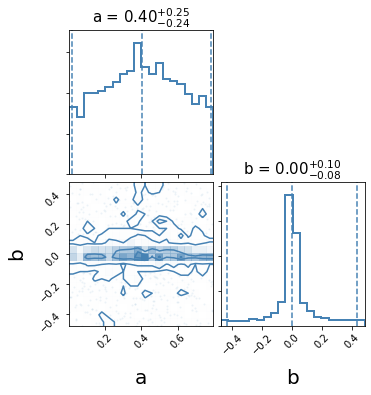

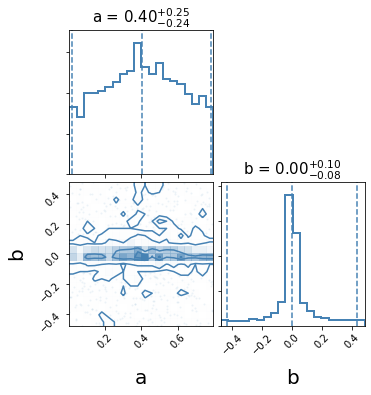

In [5]:
samples = results['samples']
corner.corner(samples[:, :2],
              range=[0.99] * 2,
              quantiles=[0.02, 0.5, 0.98],
              labels=['a','b'],
              show_titles=True,
              title_kwargs={"fontsize": 15},
              color='steelblue',
              plot_contours=True,
              hist_kwargs={'linewidth': 2},
              label_kwargs={'fontsize': 20})